Marketing Campaigns

Problem scenario: 
Marketing mix stands as a widely utilized concept in the execution of marketing strategies. It encompasses various facets within a comprehensive marketing plan, with a central focus on the four Ps of marketing: product, price, place, and promotion.

Problem objective:
As a data scientist, you must conduct exploratory data analysis and hypothesis testing to enhance your comprehension of the diverse factors influencing customer acquisition.

Data description:
The variables such as birth year, education, income, and others pertain to the first 'P' or 'People' in the tabular data presented to the user. The expenditures on items like wine, fruits, and gold, are associated with ‘Product’. Information relevant to sales channels, such as websites and stores, is connected to ‘Place’, and the fields discussing promotions and the outcomes of various campaigns are linked to ‘Promotion’.


Steps to perform:

1.	After importing the data, examine variables such as Dt_Customer and Income to verify their accurate importation.


In [294]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [295]:
# Load the dfset
df=pd.read_csv('marketing_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [296]:
memory_before = df.memory_usage(deep=True)
print(memory_before)
print(f"Total Memory: {memory_before.sum() / 1024**2:.2f} MB")

Index                     132
ID                      17920
Year_Birth              17920
Education              126602
Marital_Status         125604
 Income                133712
Kidhome                 17920
Teenhome                17920
Dt_Customer            125363
Recency                 17920
MntWines                17920
MntFruits               17920
MntMeatProducts         17920
MntFishProducts         17920
MntSweetProducts        17920
MntGoldProds            17920
NumDealsPurchases       17920
NumWebPurchases         17920
NumCatalogPurchases     17920
NumStorePurchases       17920
NumWebVisitsMonth       17920
AcceptedCmp3            17920
AcceptedCmp4            17920
AcceptedCmp5            17920
AcceptedCmp1            17920
AcceptedCmp2            17920
Response                17920
Complain                17920
Country                114668
dtype: int64
Total Memory: 0.99 MB


In [297]:

# Read the file in chunks
chunksize = 10000
chunks = pd.read_csv('marketing_data.csv', chunksize=chunksize)

# Store processed chunks
processed_chunks = []

# Process each chunk
for chunk in chunks:
    # Convert the date column to a datetime object
    chunk['Dt_Customer'] = pd.to_datetime(chunk['Dt_Customer'])
    # Perform other processing on the chunk
    # move $ sign and decimal places from Income column
    # if 'Income' in chunk.columns:
    #     chunk['Income'] = chunk['Income'].str.replace('$', '').str.split('.').str[0]
    chunk = chunk.astype({col: "category" for col in chunk.select_dtypes(include=["object"]).columns})
    chunk = chunk.astype({col: "int16" for col in chunk.select_dtypes(include=["int64"]).columns})
    chunk = chunk.astype({col: "float32" for col in chunk.select_dtypes(include=["float64"]).columns})
    processed_chunks.append(chunk)

# Example of setting the index after processing all chunks
df = pd.concat(processed_chunks)
df.set_index('Dt_Customer', inplace=True)




df.info()

C:\Users\user\AppData\Local\Temp\ipykernel_8516\519053453.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk['Dt_Customer'] = pd.to_datetime(chunk['Dt_Customer'])


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2240 entries, 2014-06-16 to 2012-09-01
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2240 non-null   int16   
 1   Year_Birth           2240 non-null   int16   
 2   Education            2240 non-null   category
 3   Marital_Status       2240 non-null   category
 4    Income              2216 non-null   category
 5   Kidhome              2240 non-null   int16   
 6   Teenhome             2240 non-null   int16   
 7   Recency              2240 non-null   int16   
 8   MntWines             2240 non-null   int16   
 9   MntFruits            2240 non-null   int16   
 10  MntMeatProducts      2240 non-null   int16   
 11  MntFishProducts      2240 non-null   int16   
 12  MntSweetProducts     2240 non-null   int16   
 13  MntGoldProds         2240 non-null   int16   
 14  NumDealsPurchases    2240 non-null   int16   
 15  Num

In [298]:
memory_after = df.memory_usage(deep=True)
print(memory_after)
print(f"Total Memory before: {memory_before.sum() / 1024**2:.2f} MB")
print(f"Total Memory after: {memory_after.sum() / 1024**2:.2f} MB")

Index                   17920
ID                       4480
Year_Birth               4480
Education                2689
Marital_Status           2981
 Income                189003
Kidhome                  4480
Teenhome                 4480
Recency                  4480
MntWines                 4480
MntFruits                4480
MntMeatProducts          4480
MntFishProducts          4480
MntSweetProducts         4480
MntGoldProds             4480
NumDealsPurchases        4480
NumWebPurchases          4480
NumCatalogPurchases      4480
NumStorePurchases        4480
NumWebVisitsMonth        4480
AcceptedCmp3             4480
AcceptedCmp4             4480
AcceptedCmp5             4480
AcceptedCmp1             4480
AcceptedCmp2             4480
Response                 4480
Complain                 4480
Country                  2951
dtype: int64
Total Memory before: 0.99 MB
Total Memory after: 0.30 MB


In [299]:
df.describe()
df.columns=df.columns.str.replace(' ','')
print(df.columns)


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country'],
      dtype='object')


2.	There are missing income values for some customers. Conduct missing value imputation, considering that customers with similar education and marital status tend to have comparable yearly incomes, on average. It may be necessary to cleanse the data before proceeding. Specifically, scrutinize the categories of education and marital status for data cleaning. 

In [300]:
missing_values = df.isna().sum()
# print("Missing values in each column:\n", missing_values)
# Clean the Education and Marital_Status columns
df['Education'] = df['Education'].str.strip().str.lower()
df['Marital_Status'] = df['Marital_Status'].str.strip().str.lower()

# Check if Income column is of type object before applying string operations
if df['Income'].dtype == 'object' or df['Income'].dtype == 'category':
    # Remove $ sign and convert Income to numeric
    df['Income'] = df['Income'].str.replace('$', '').str.split('.').str[0].str.replace(',', '') 
    df['Income'] = pd.to_numeric(df['Income'], downcast='integer')

# Calculate mean Income for each group of Education and Marital_Status
income_means = df.groupby(['Education', 'Marital_Status'])['Income'].mean()
df['Income'] = df.apply(
    lambda row: income_means[row['Education'], row['Marital_Status']] if pd.isnull(row['Income']) else row['Income'],
    axis=1
)
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

3.	Create variables to represent the total number of children, age, and total spending

In [301]:
# Create a new column for total number of children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Create a new column for age
current_year = pd.to_datetime('today').year
df['Age'] = current_year - df['Year_Birth']

# Create a new column for total spending
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_columns].sum(axis=1)

# Display the updated dataframe
df[['Total_Children', 'Age', 'Total_Spending']].head()

,Total_Children,Age,Total_Spending
Dt_Customer,,,
2014-06-16,0,55,1190
2014-06-15,0,64,577
2014-05-13,1,67,251
2014-05-11,2,58,11
2014-04-08,1,36,91


a.	Derive the total purchases from the number of transactions across the three channels.

In [302]:
# Create a new column for total purchases
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Display the updated dataframe
df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_Purchases']].head()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases
Dt_Customer,,,,
2014-06-16,4,4,6,14
2014-06-15,7,3,7,17
2014-05-13,3,2,5,10
2014-05-11,1,0,2,3
2014-04-08,3,1,2,6


4.	Generate box plots and histograms to gain insights into the distributions and identify outliers. Implement outlier treatment as needed.

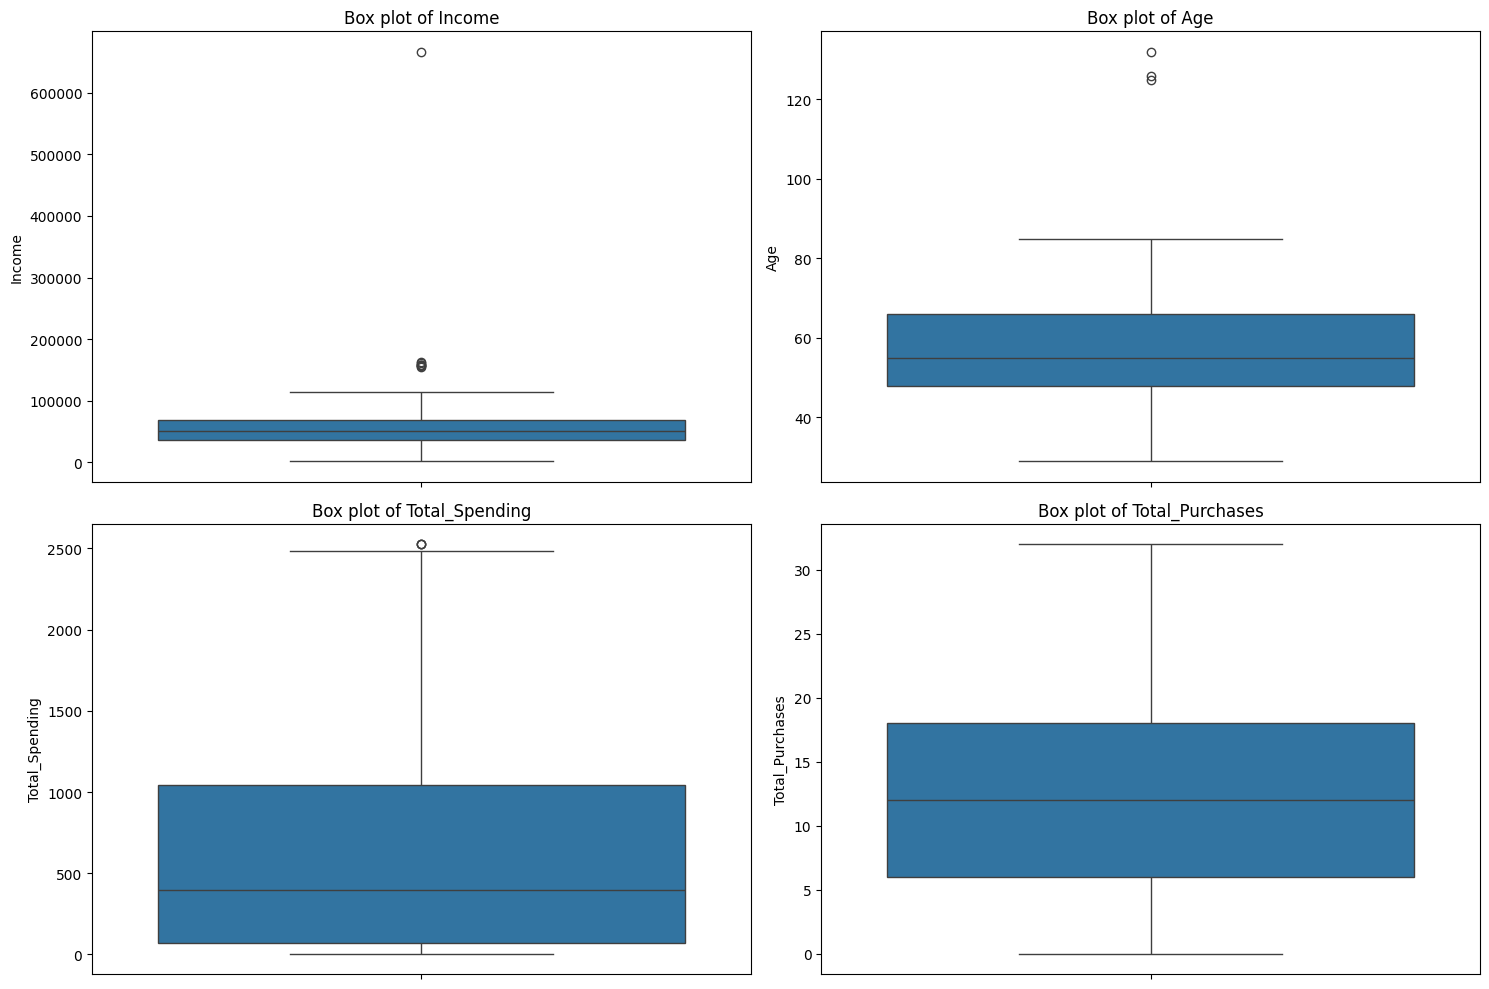

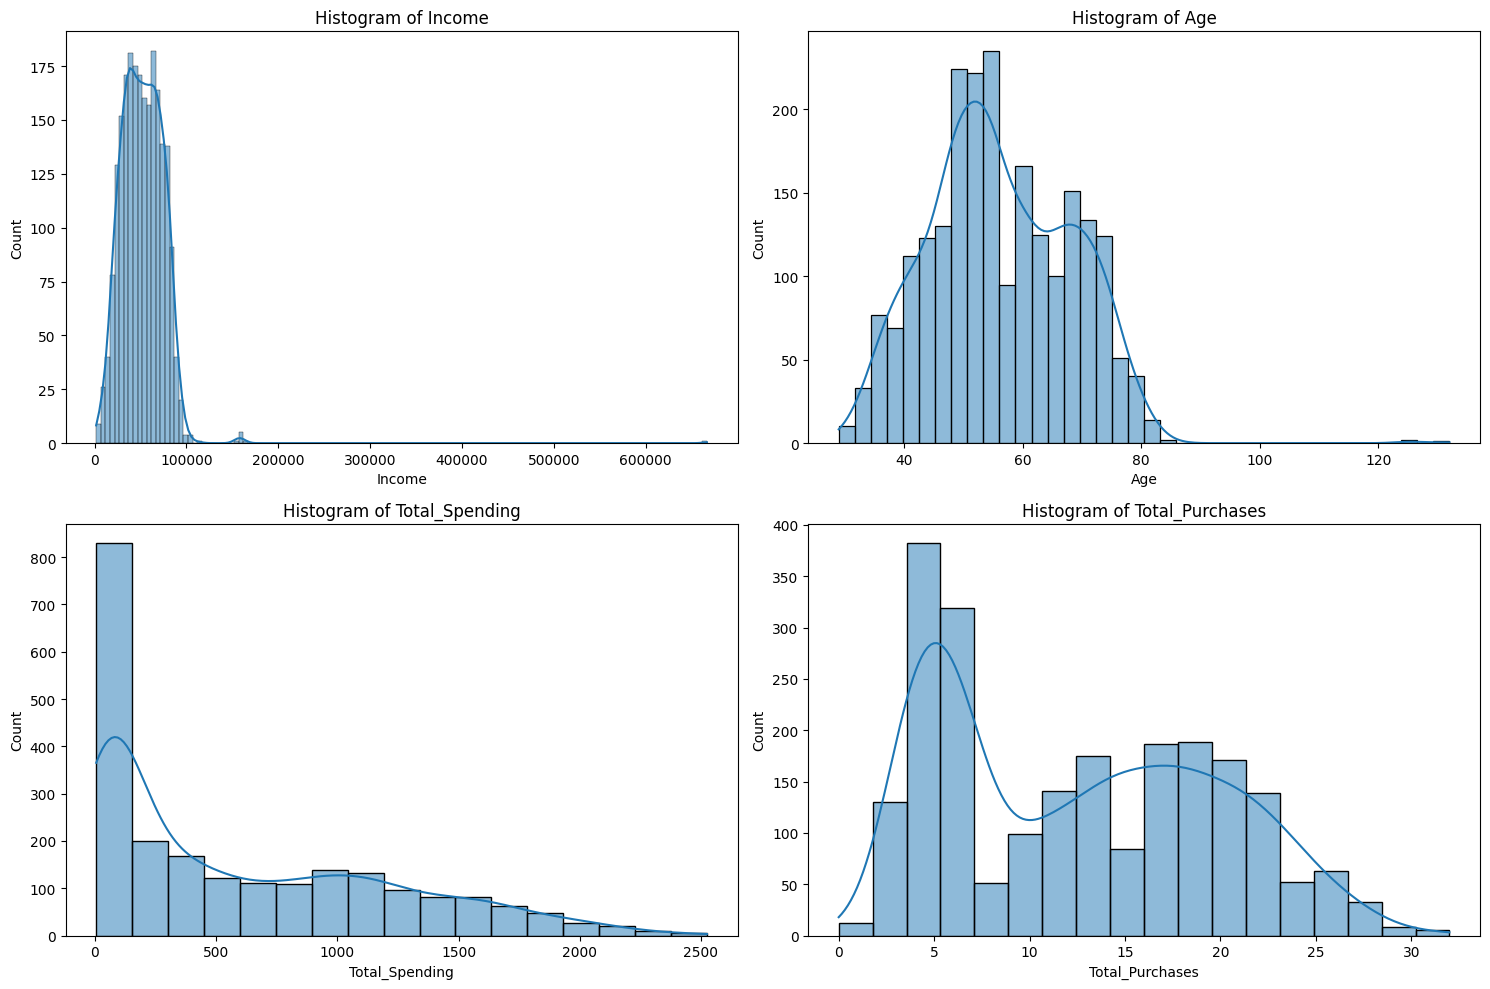

Number of outliers in Income: 8
Number of outliers in Age: 3
Number of outliers in Total_Spending: 3
Number of outliers in Total_Purchases: 0


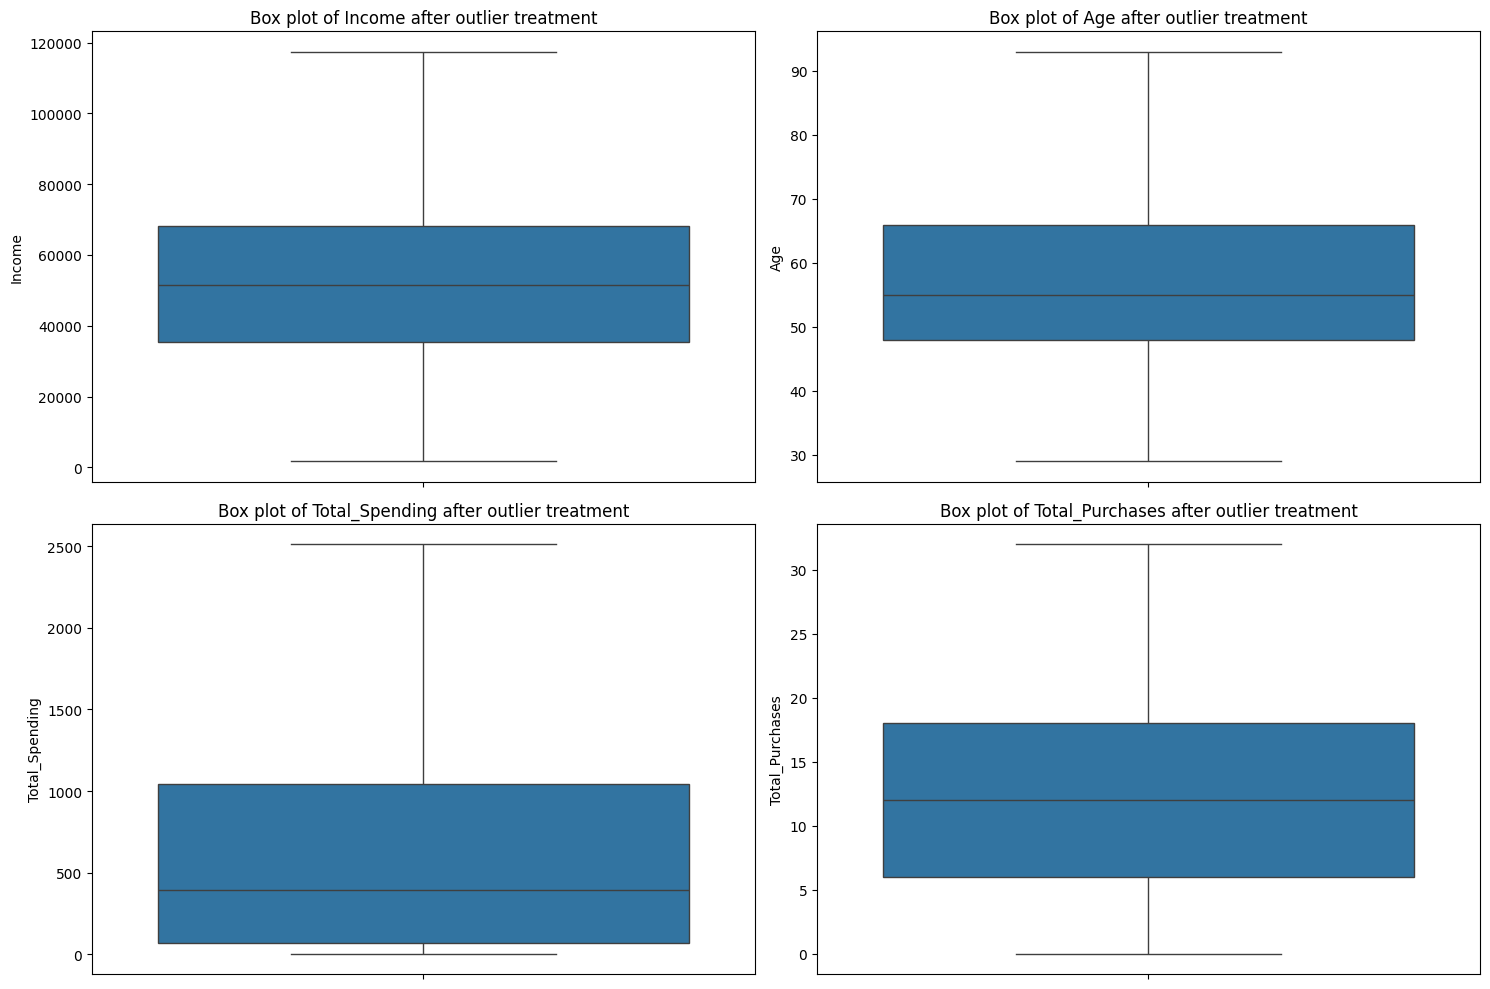

In [303]:
# Generate box plots for numerical columns
numerical_columns = ['Income', 'Age', 'Total_Spending', 'Total_Purchases']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

# Generate histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

# Identify outliers using IQR method
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    print(f'Number of outliers in {column}: {outliers.shape[0]}')

# Example of outlier treatment: capping the outliers
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Verify the outlier treatment
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column} after outlier treatment')
plt.tight_layout()
plt.show()

5.	Apply ordinal and one-hot encoding based on the various types of categorical variables.

In [304]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Apply ordinal encoding to the 'Education' column
ordinal_encoder = OrdinalEncoder()
df['Education_Ordinal'] = ordinal_encoder.fit_transform(df[['Education']])

# Apply one-hot encoding to the 'Marital_Status' column
one_hot_encoder_marital = OneHotEncoder(sparse_output=False)
marital_status_encoded = one_hot_encoder_marital.fit_transform(df[['Marital_Status']])
marital_status_df = pd.DataFrame(marital_status_encoded, columns=one_hot_encoder_marital.get_feature_names_out(['Marital_Status']))
marital_status_df.index = df.index

# Apply one-hot encoding to the 'Country' column
one_hot_encoder_country = OneHotEncoder(sparse_output=False)
country_encoded = one_hot_encoder_country.fit_transform(df[['Country']])
country_df = pd.DataFrame(country_encoded, columns=one_hot_encoder_country.get_feature_names_out(['Country']))
country_df.index = df.index

# Concatenate the one-hot encoded columns to the original dataframe
df = pd.concat([df, marital_status_df, country_df], axis=1)

# Drop the original categorical columns if needed
df.drop(['Education', 'Marital_Status', 'Country'], axis=1, inplace=True)





In [305]:
# Display the updated dataframe
df.columns[df.columns.str.endswith('e')]
# df.columns[df.columns.str.startswith('Country')]



Index(['Income', 'Kidhome', 'Teenhome', 'Response', 'Age',
       'Marital_Status_alone', 'Marital_Status_single'],
      dtype='object')

6.	Generate a heatmap to illustrate the correlation between different pairs of variables.

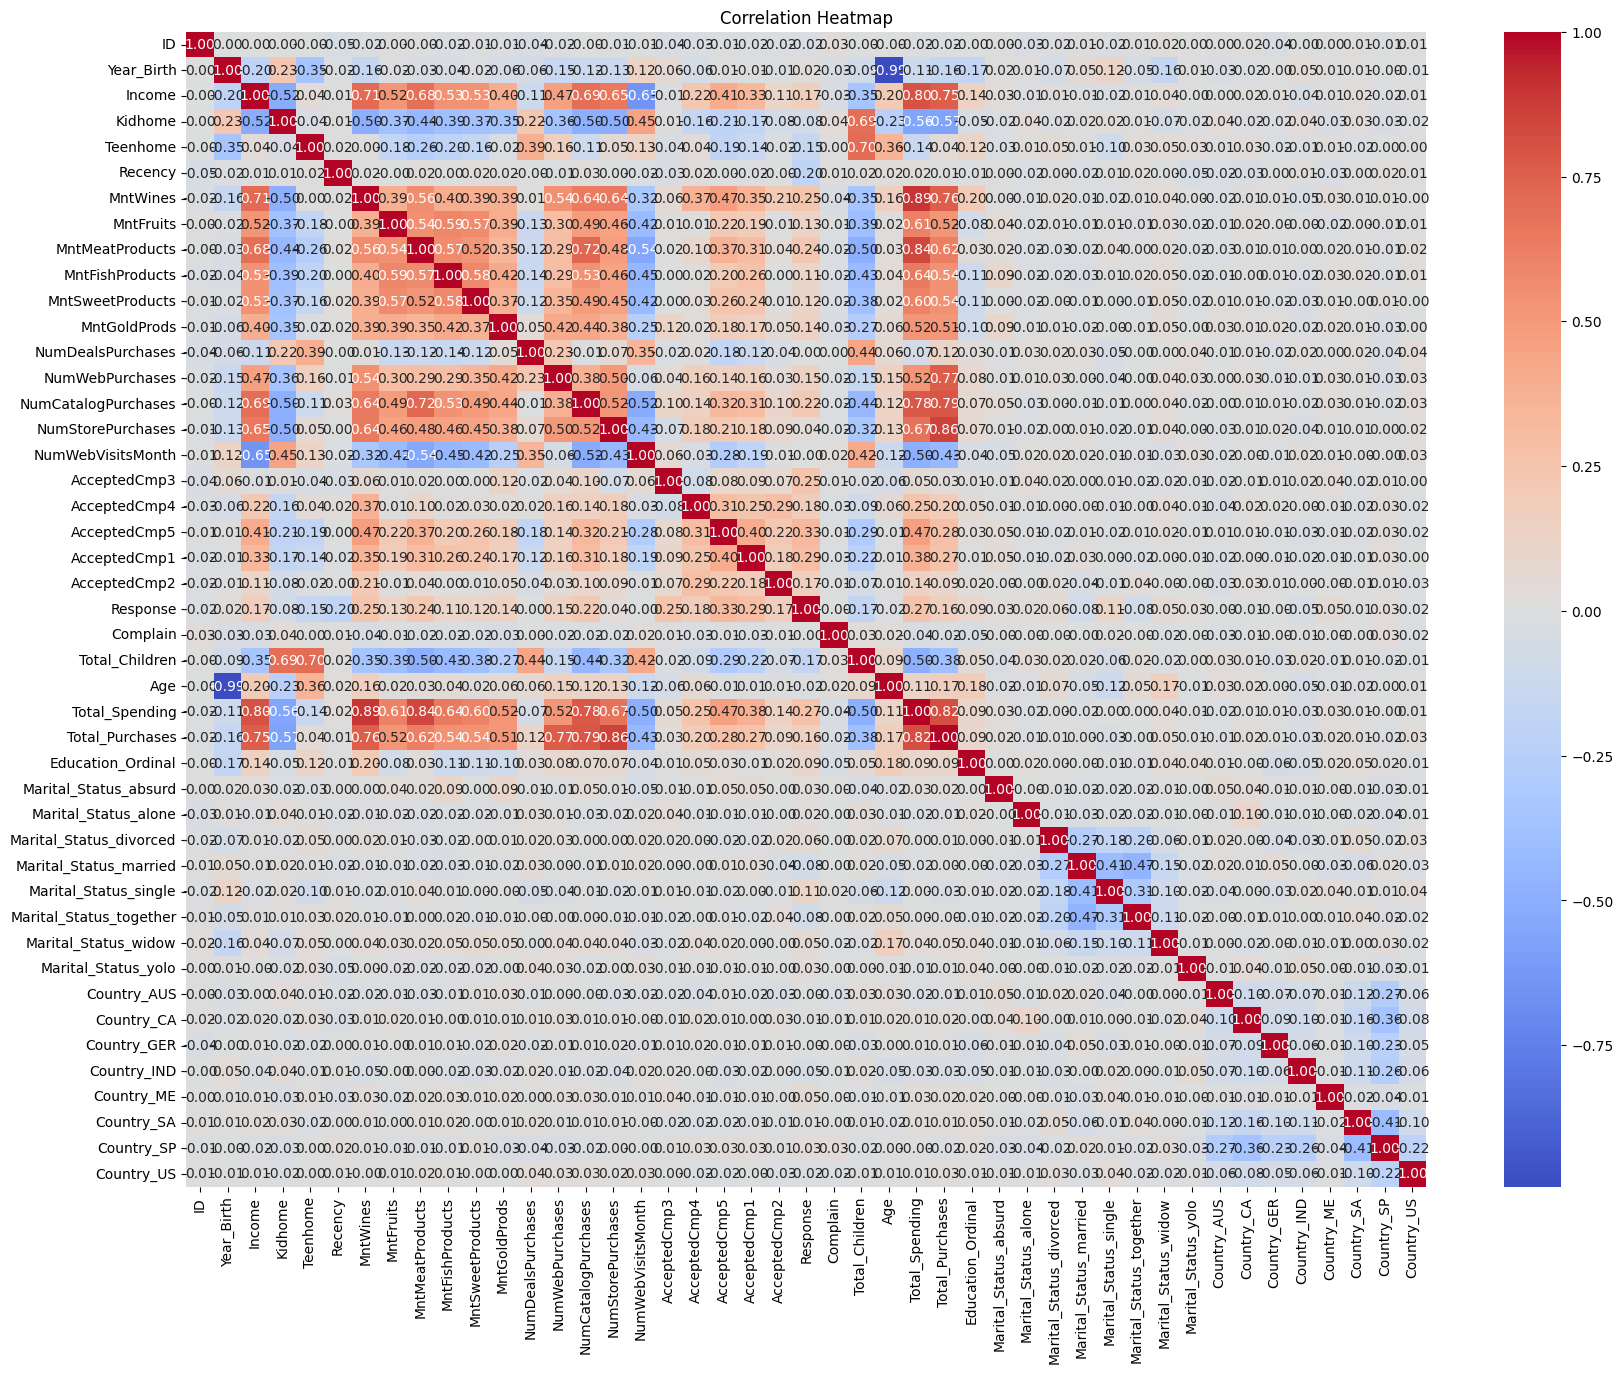

In [306]:
# Generate a heatmap to illustrate the correlation between different pairs of variables
plt.figure(figsize=(20, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

7.	Test the following hypotheses:
a.	Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.


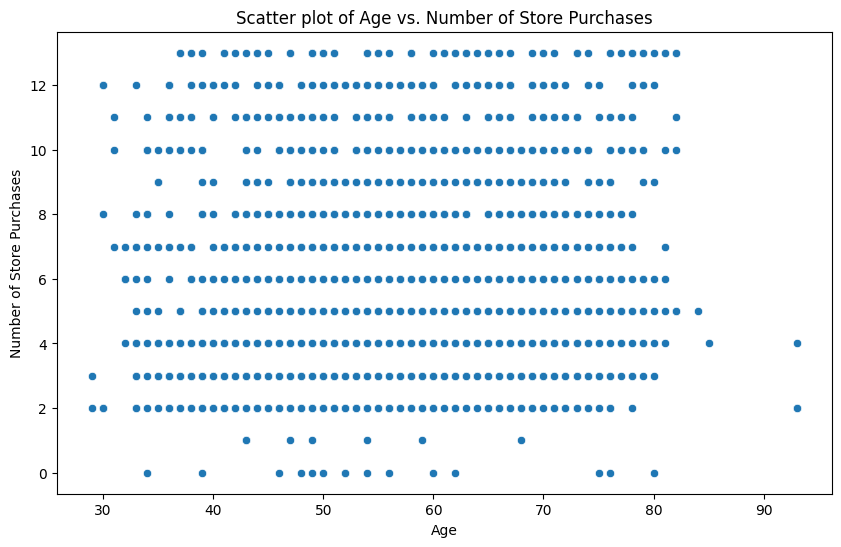

Correlation coefficient between Age and Number of Store Purchases: 0.13


In [307]:
# Scatter plot to visualize the relationship between Age and NumStorePurchases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='NumStorePurchases', data=df)
plt.title('Scatter plot of Age vs. Number of Store Purchases')
plt.xlabel('Age')
plt.ylabel('Number of Store Purchases')
plt.show()

# Calculate the correlation coefficient between Age and NumStorePurchases
correlation = df['Age'].corr(df['NumStorePurchases'])
print(f'Correlation coefficient between Age and Number of Store Purchases: {correlation:.2f}')

b.	Customers with children likely experience time constraints, making online shopping a more convenient option.

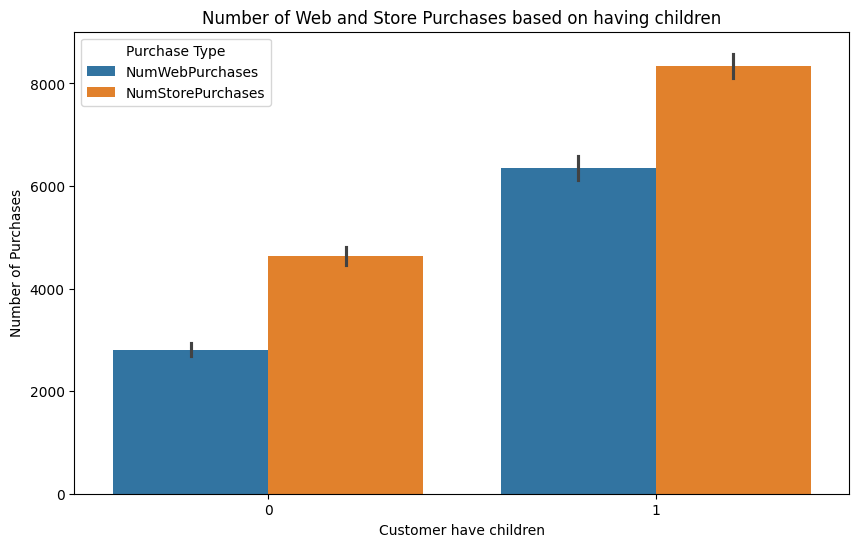

Correlation coefficient between Web Purchases and customer_have_children: -0.07


In [308]:
df['customer_have_children'] = df['Kidhome'] + df['Teenhome']
df['customer_have_children'] = df['customer_have_children'].apply(lambda x:1 if x>0 else 0) 

# Melt the DataFrame to have a long-form DataFrame suitable for seaborn
df_melted = df.melt(id_vars=['customer_have_children'], value_vars=['NumWebPurchases', 'NumStorePurchases'], var_name='PurchaseType', value_name='NumberOfPurchases')

# Display barplot of Number of Web Purchases and Store Purchases based on having children
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_have_children', y='NumberOfPurchases', hue='PurchaseType', data=df_melted, estimator=sum)
plt.title('Number of Web and Store Purchases based on having children')
plt.xlabel('Customer have children')
plt.ylabel('Number of Purchases')
plt.legend(title='Purchase Type')
plt.show()

# Calculate the correlation coefficients
correlation_web = df['NumWebPurchases'].corr(df['customer_have_children'])
print(f'Correlation coefficient between Web Purchases and customer_have_children: {correlation_web:.2f}')




c.	Sales at physical stores may face the risk of cannibalization by alternative distribution channels.

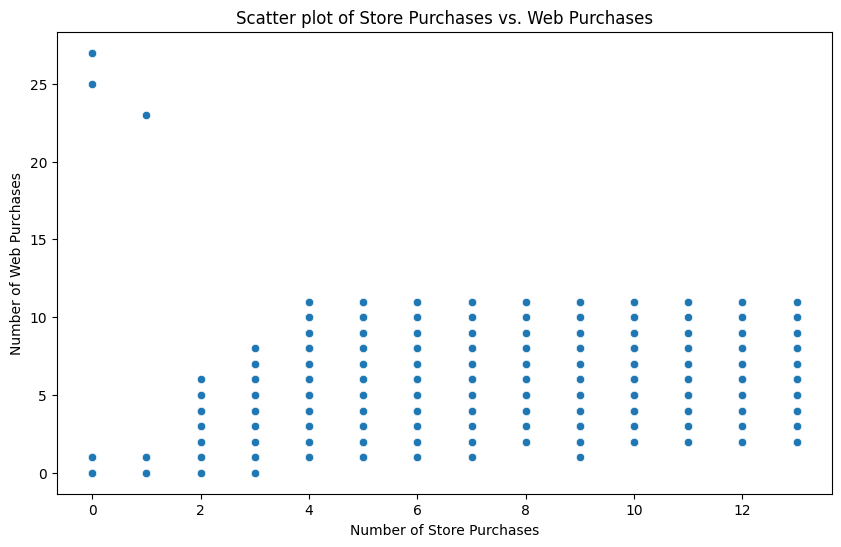

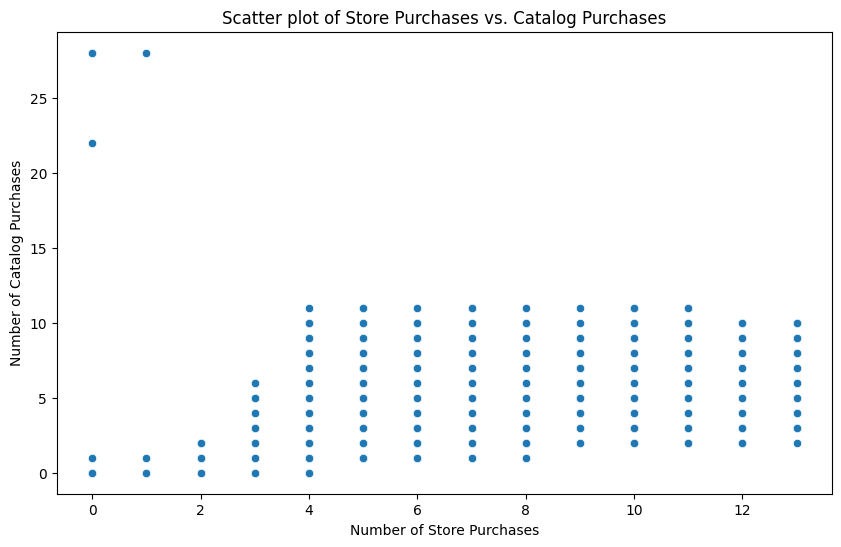

Correlation coefficient between Store Purchases and Web Purchases: 0.50
Correlation coefficient between Store Purchases and Catalog Purchases: 0.52


In [309]:
# Scatter plot to visualize the relationship between NumStorePurchases and NumWebPurchases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumStorePurchases', y='NumWebPurchases', data=df)
plt.title('Scatter plot of Store Purchases vs. Web Purchases')
plt.xlabel('Number of Store Purchases')
plt.ylabel('Number of Web Purchases')
plt.show()

# Scatter plot to visualize the relationship between NumStorePurchases and NumCatalogPurchases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumStorePurchases', y='NumCatalogPurchases', data=df)
plt.title('Scatter plot of Store Purchases vs. Catalog Purchases')
plt.xlabel('Number of Store Purchases')
plt.ylabel('Number of Catalog Purchases')
plt.show()

# Calculate the correlation coefficients
correlation_web = df['NumStorePurchases'].corr(df['NumWebPurchases'])
correlation_catalog = df['NumStorePurchases'].corr(df['NumCatalogPurchases'])
print(f'Correlation coefficient between Store Purchases and Web Purchases: {correlation_web:.2f}')
print(f'Correlation coefficient between Store Purchases and Catalog Purchases: {correlation_catalog:.2f}')

d.	Does the United States significantly outperform the rest of the world in total purchase volumes?

In [310]:
from scipy.stats import ttest_ind

# df.to_csv('marketing_data_cleaned.csv', index=False)

# Create a new column to indicate if the customer is from the US
df['Is_US'] = df['Country_US']

# Calculate the mean total purchases for US and non-US customers
mean_total_purchases_us = df[df['Is_US'] == 1]['Total_Purchases'].mean()
mean_total_purchases_non_us = df[df['Is_US'] == 0]['Total_Purchases'].mean()

print(f'Mean Total Purchases for US customers: {mean_total_purchases_us:.2f}')
print(f'Mean Total Purchases for non-US customers: {mean_total_purchases_non_us:.2f}')

# Perform a t-test to check if the difference in means is statistically significant

us_purchases = df[df['Is_US'] == 1]['Total_Purchases']
non_us_purchases = df[df['Is_US'] == 0]['Total_Purchases']

t_stat, p_value = ttest_ind(us_purchases, non_us_purchases, equal_var=False)
print(f'T-statistic: {t_stat:.2f}')
print(f'P-value: {p_value:.2e}')

# Determine if the difference is significant
if p_value < 0.05:
    print("The United States significantly outperforms the rest of the world in total purchase volumes.")
else:
    print("The United States does not significantly outperform the rest of the world in total purchase volumes.")


Mean Total Purchases for US customers: 13.51
Mean Total Purchases for non-US customers: 12.49
T-statistic: 1.47
P-value: 1.45e-01
The United States does not significantly outperform the rest of the world in total purchase volumes.


8.	Use appropriate visualization to help analyze the following:

    a.	Identify the top-performing products and those with the lowest revenue.


Top-performing products:
MntWines            680816
MntMeatProducts     373968
MntGoldProds         98609
MntFishProducts      84057
MntSweetProducts     60621
dtype: int64

Products with the lowest revenue:
MntMeatProducts     373968
MntGoldProds         98609
MntFishProducts      84057
MntSweetProducts     60621
MntFruits            58917
dtype: int64


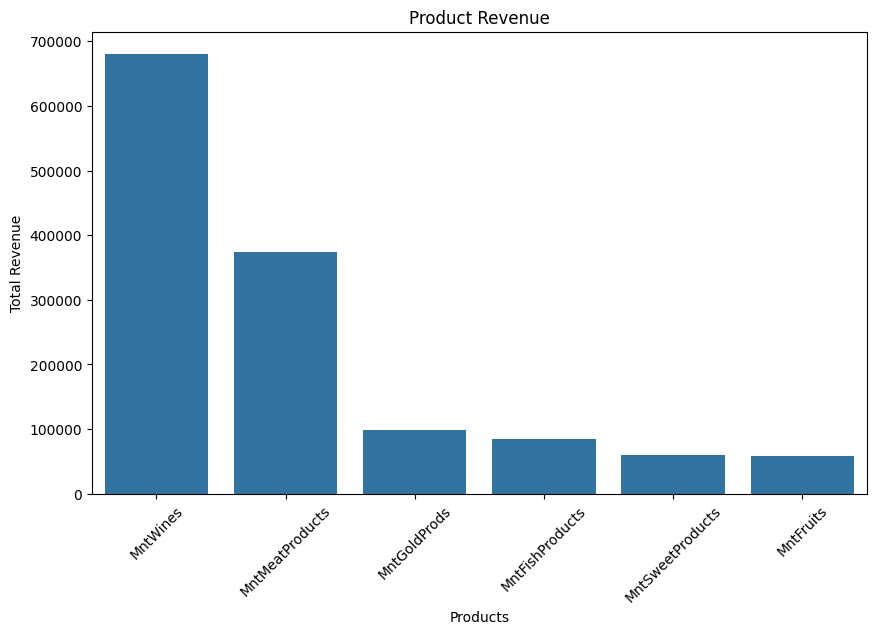

In [311]:
# Define the spending columns
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate the total revenue for each product
product_revenue = df[spending_columns].sum().sort_values(ascending=False)

# Identify the top-performing products
top_performing_products = product_revenue.head()

# Identify the products with the lowest revenue
lowest_revenue_products = product_revenue.tail()

print("Top-performing products:")
print(top_performing_products)

print("\nProducts with the lowest revenue:")
print(lowest_revenue_products)

# Visualize the product revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=product_revenue.index, y=product_revenue.values)
plt.title('Product Revenue')
plt.xlabel('Products')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

b.	Examine if there is a correlation between customers' age and the acceptance rate of the last campaign

In [312]:
# Calculate the correlation coefficients
correlation_age_response = df['Age'].corr(df['Response'])
print(f'Correlation coefficient between customers age and the acceptance rate of the last campaign: {correlation_age_response:.2f}')



Correlation coefficient between customers age and the acceptance rate of the last campaign: -0.02


c.	Determine the country with the highest number of customers who accepted the last campaign.

In [313]:
# Calculate the total number of customers who accepted the last campaign for each country
country_acceptance = df[country_columns].multiply(df['Response'], axis=0).sum().sort_values(ascending=False)

# Identify the country with the highest number of customers who accepted the last campaign
top_country = country_acceptance.idxmax()
top_country_count = country_acceptance.max()

print(f'The country with the highest number of customers who accepted the last campaign is {top_country} with {top_country_count} acceptances.')

# Display the acceptance counts for each country
print("\nAcceptance counts for each country:")
print(country_acceptance)

The country with the highest number of customers who accepted the last campaign is Country_SP with 176.0 acceptances.

Acceptance counts for each country:
Country_SP     176.0
Country_SA      52.0
Country_CA      38.0
Country_AUS     23.0
Country_GER     17.0
Country_IND     13.0
Country_US      13.0
Country_ME       2.0
dtype: float64


d.	Investigate if there is a discernible pattern in the number of children at home and the total expenditure.

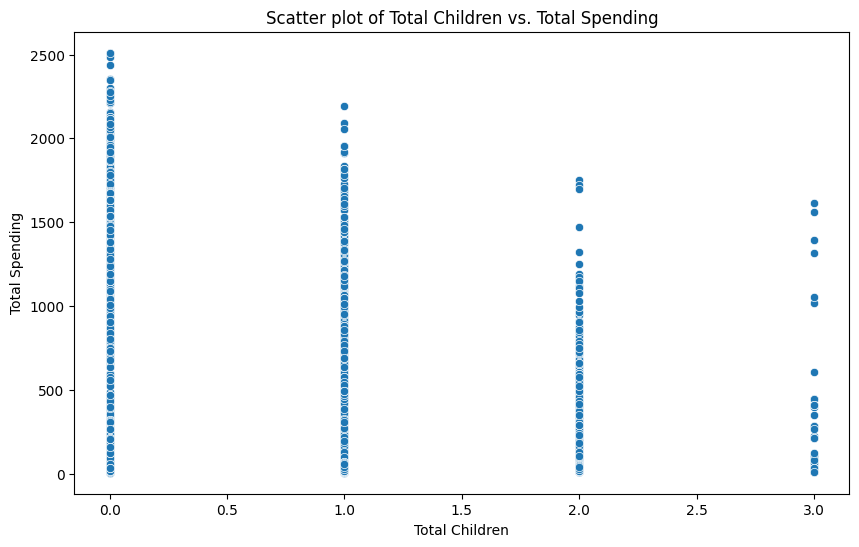

Correlation coefficient between Total Children and Total Spending: -0.50


In [314]:
# Scatter plot to visualize the relationship between Total_Children and Total_Spending
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Children', y='Total_Spending', data=df)
plt.title('Scatter plot of Total Children vs. Total Spending')
plt.xlabel('Total Children')
plt.ylabel('Total Spending')
plt.show()

# Calculate the correlation coefficient between Total_Children and Total_Spending
correlation_children_spending = df['Total_Children'].corr(df['Total_Spending'])
print(f'Correlation coefficient between Total Children and Total Spending: {correlation_children_spending:.2f}')

e.	Analyze the educational background of customers who lodged complaints in the last two years.

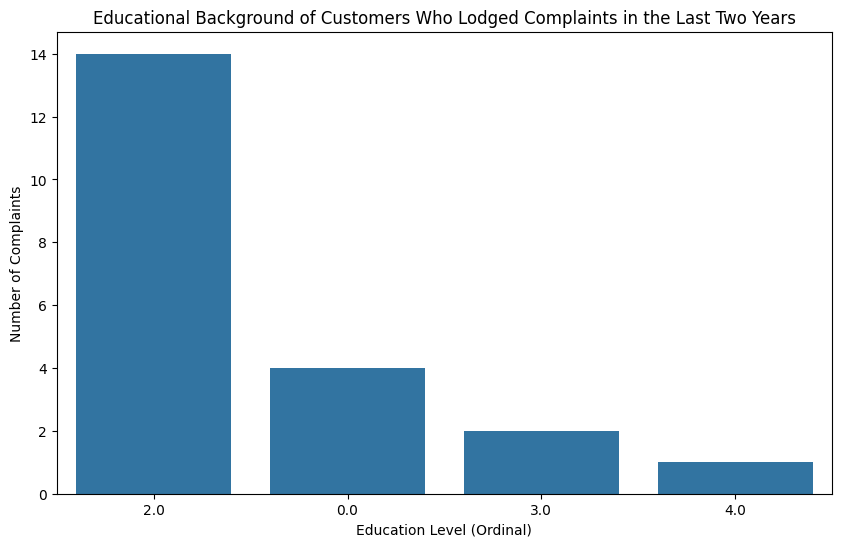

Number of complaints for each education level:
Education_Ordinal
2.0    14
0.0     4
3.0     2
4.0     1
Name: count, dtype: int64


In [315]:
# Filter the dataframe for customers who lodged complaints in the last two years
complaints_df = df[df['Complain'] == 1]

# Plot the distribution of education levels among customers who lodged complaints
plt.figure(figsize=(10, 6))
sns.countplot(x='Education_Ordinal', data=complaints_df, order=complaints_df['Education_Ordinal'].value_counts().index)
plt.title('Educational Background of Customers Who Lodged Complaints in the Last Two Years')
plt.xlabel('Education Level (Ordinal)')
plt.ylabel('Number of Complaints')
plt.show()

# Display the count of complaints for each education level
education_complaints = complaints_df['Education_Ordinal'].value_counts()
print("Number of complaints for each education level:")
print(education_complaints)